# Project Title: Flight Price Prediction

# Introduction

#### Objective
Create a model to predict flight ticket prices based on various factors.

#### Key Features Analyzed
- **Airline:** Different airlines may charge different prices.
- **Date of Journey:** Prices can change depending on the day or season.
- **Source and Destination Cities:** Prices vary based on where you’re flying from and to.
- **Route Details:** Direct flights may cost more than those with layovers.
- **Departure and Arrival Times:** Prices can be higher for popular travel times.
- **Duration:** Longer flights might be more expensive.
- **Total Stops:** More stops can lead to different pricing.
- **Additional Flight Info:** Extra services or rules may influence prices.
- **Actual Ticket Price:** Historical data helps train the model.

#### Analysis Goal
- **Understand Pricing Factors:** Use data to see how these features affect ticket prices.

#### Methodology
- **Data Collection:** Gather flight data from reliable sources.
- **Data Preprocessing:** Clean and organize the data for analysis.
- **Exploratory Data Analysis (EDA):** Visualize trends and relationships in the data.
- **Model Development:** Use machine learning algorithms to build the prediction model.
- **Model Evaluation:** Check how well the model performs using metrics like MAE and RMSE.

#### Benefits for Stakeholders
###### For Airlines:
- Optimize pricing strategies to stay competitive.
- Make better decisions for promotions and fare adjustments.

###### For Travel Agencies:
- Offer competitive prices to attract customers.
- Improve customer satisfaction with better pricing.

#### Project Contributions
- **Market Insights:** Provide understanding of pricing trends and demand changes.
- **Revenue Management:** Help airlines and agencies manage pricing effectively.
- **Better Customer Experience:** Ensure customers get the best deals and improve loyalty.


# Code

### Import Libraries:

- **train_test_split:** This function is used to split the dataset into training and testing subsets.
- **RandomForestRegressor:** This class implements the Random Forest algorithm for regression tasks.
- **metrics:** Contains functions for evaluating model performance, such as calculating error metrics.
- **numpy, seaborn, matplotlib.pyplot:** Libraries for numerical operations and data visualization.
- **pickle:** Used for serializing and deserializing Python objects, allowing you to save your trained model.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

- Loads flight price data from an Excel file into a Pandas DataFrame called train_data.

In [49]:
train_data = pd.read_excel("Data_Train.xlsx")

- Configures Pandas to display all columns of the DataFrame without limit when printed.

In [50]:
pd.set_option('display.max_columns', None)

- Displays the first five rows of the train_data DataFrame to provide a quick look at the data structure and content.

In [51]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


###### Output Explanation: 
    - <class 'pandas.core.frame.DataFrame'>: The object is a pandas DataFrame.
    - RangeIndex: 10683 entries, 0 to 10682: There are 10,683 rows indexed from 0 to 10,682.
    - Data columns (total 11 columns): There are 11 columns in the DataFrame.
 - Each column is displayed with:
   - Column: Name of the column.
   - Non-Null Count: Number of non-null entries in the column.
   - Dtype: Data type of the column (e.g., object, int64).
 - dtypes: Shows the number of columns for each data type.
 - memory usage: The total memory used by the DataFrame.

In [53]:
train_data["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

The command **train_data["Duration"].value_counts()** is executed to get the count of unique values in the "Duration" column of the DataFrame, which helps in understanding the distribution of flight durations. 

- **2h 50m:** This duration appears 550 times in the dataset, indicating that there are 550 flights with a duration of 2 hours and 50 minutes.
- **1h 30m:** This duration appears 386 times.
- **2h 45m:** This duration appears 337 times.
The counts continue for various durations, showing how many flights fall into each category.

The last part of the output **(Name: Duration, Length: 368, dtype: int64)** indicates that the output is a Series with the name "Duration," it contains 368 unique entries, and the data type of the counts is integer (int64).

### Checking for Null Values

In [54]:
train_data.isnull().sum()

# This command checks for null (missing) values in each column of the DataFrame and returns the count of null values for each column.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Each line represents a column in the DataFrame:
- Airline, Date_of_Journey, Source, Destination, Dep_Time, Arrival_Time, Duration, Additional_Info, Price: All have 0 null values, indicating complete data.
  - Route: Has 1 null value.
  - Total_Stops: Also has 1 null value.
- **Significance:** This output helps identify which columns may need data cleaning or imputation before proceeding with analysis or modeling. Columns with null values can impact model performance, so they need to be addressed.

### Descriptive Statistics

In [55]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


- This command provides statistical summary statistics for the numerical columns in the DataFrame, specifically focusing on the **Price** column .

- **count:** 10,683 entries in the Price column.
- **mean:** The average price is approximately 9,087.06.
- **std:** The standard deviation is about 4,611.36, indicating the price variability.
- **min:** The minimum price is 1,759.
- **25%:** The first quartile (25th percentile) price is 5,277.
- **50% (median):** The median price is 8,372.
- **75%:** The third quartile (75th percentile) price is 12,373.
- **max:** The maximum price is 79,512.
- **Significance:** This summary helps understand the distribution of flight prices in the dataset, highlighting central tendencies and the spread of data. It can inform decisions on data transformations or the choice of modeling techniques.

In [56]:
train_data.dropna(inplace=True)

# This command removes all rows from the DataFrame that contain any null values.

#### Verifying Null Value Handling Again

In [57]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

- After dropping null values, all columns now show 0 null values, confirming that any entries with missing data have been successfully removed.
- Significance: Ensuring that there are no null values in the dataset is crucial before fitting a model, as many algorithms cannot handle missing values effectively.

## EDA

##### Purpose:

- Understand data structure and content.
- Identify patterns, trends, and relationships.
- Detect outliers and anomalies.
- Test assumptions about the data.
- Inform feature engineering and transformations.

##### Common Techniques:

- **Descriptive Statistics:** Summarize data (mean, median, standard deviation).
- **Data Visualization:** Use charts (histograms, scatter plots, box plots) to visualize distributions and relationships.
- **Correlation Analysis:** Examine relationships between variables (correlation coefficients, heatmaps).
- **Handling Missing Values:** Assess and treat missing data appropriately.
- **Categorical Analysis:** Analyze frequency distributions of categorical variables.

##### Importance:

- Lays the foundation for modeling.
- Informs business decisions and hypotheses.
- Improves machine learning model performance through data cleaning and relevant feature identification.

In [58]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [59]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

From description we can see that **Date_of_Journey** is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

- **.dt.day** method will extract only day of that date
- **.dt.month** method will extract only month of that date

In [60]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [61]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [62]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\rango\AppData\Local\Temp\ipykernel_12968\569228883.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
C:\Users\rango\AppData\Local\Temp\ipykernel_12968\569228883.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


#### Dropping `Dep_Time` in EDA

1. **Understanding the Data**:
   - `Dep_Time` represents the departure time of flights, initially stored as a string (object data type).

2. **Transforming Data for Analysis**:
   - The goal is to convert `Dep_Time` into numerical features:
     - **`Dep_hour`**: Extracts the hour from the departure time.
     - **`Dep_min`**: Extracts the minute from the departure time.
   - This transformation makes the data suitable for modeling.

3. **Removing Redundant Information**:
   - After creating `Dep_hour` and `Dep_min`, the original `Dep_Time` becomes unnecessary.
   - Dropping `Dep_Time` simplifies the dataset and eliminates clutter.

4. **Efficiency**:
   - Keeping only relevant features improves model training efficiency by reducing dimensionality and focusing on useful information.


In [63]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\rango\AppData\Local\Temp\ipykernel_12968\1117634591.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
C:\Users\rango\AppData\Local\Temp\ipykernel_12968\1117634591.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [64]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


-  refers to the time taken for a plane to arrive at its destination. It is calculated as the difference between the departure time and the arrival time.

- Converting the Duration column into a list:

In [65]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [66]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [67]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [68]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data

- <span style="color:blue">**Identify the Type of Categorical Data:**</span>
  - <span>**Nominal Data**</span>: Categories that do not have an inherent order (e.g., Airline names).
  - <span>**Ordinal Data**</span>: Categories that have a meaningful order (e.g., Rating on a scale).

- <span style="color:blue">**Encoding Techniques:**</span>
  - <span>**One-Hot Encoding**</span>: Used for nominal data to create binary columns for each category.
  - <span>**Label Encoding**</span>: Used for ordinal data, assigning each category an integer based on its order.


In [69]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

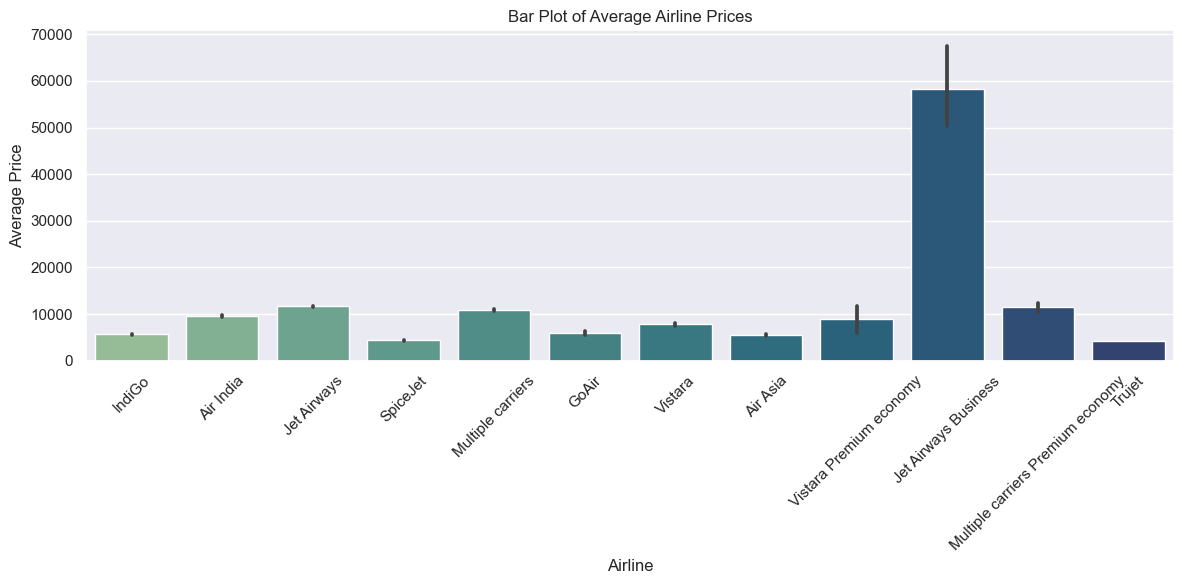

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Price', data=train_data, estimator='mean', palette='crest')
plt.title('Bar Plot of Average Airline Prices')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


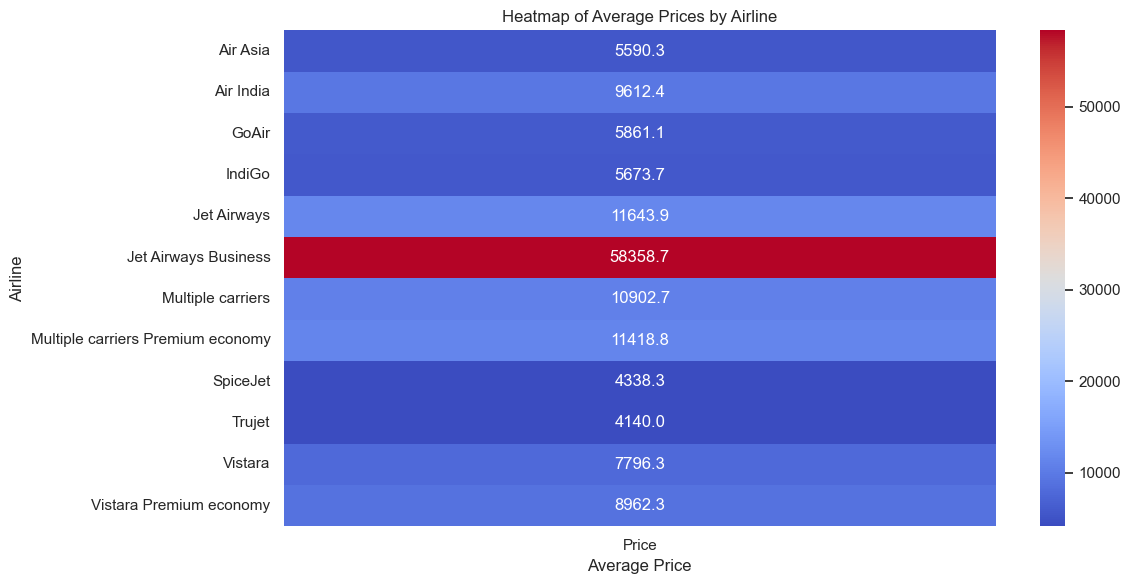

In [71]:
# Create a pivot table for the heatmap
price_pivot = train_data.pivot_table(values='Price', index='Airline', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(price_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Heatmap of Average Prices by Airline')
plt.ylabel('Airline')
plt.xlabel('Average Price')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


From graph we can see that **Jet Airways Business** have the highest Price.


In [81]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [72]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


- Each row corresponds to a flight, and each column represents a city.
- A value of **True (or 1)** means the flight is from that city, while **False (or 0)** means it is not.

In [73]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

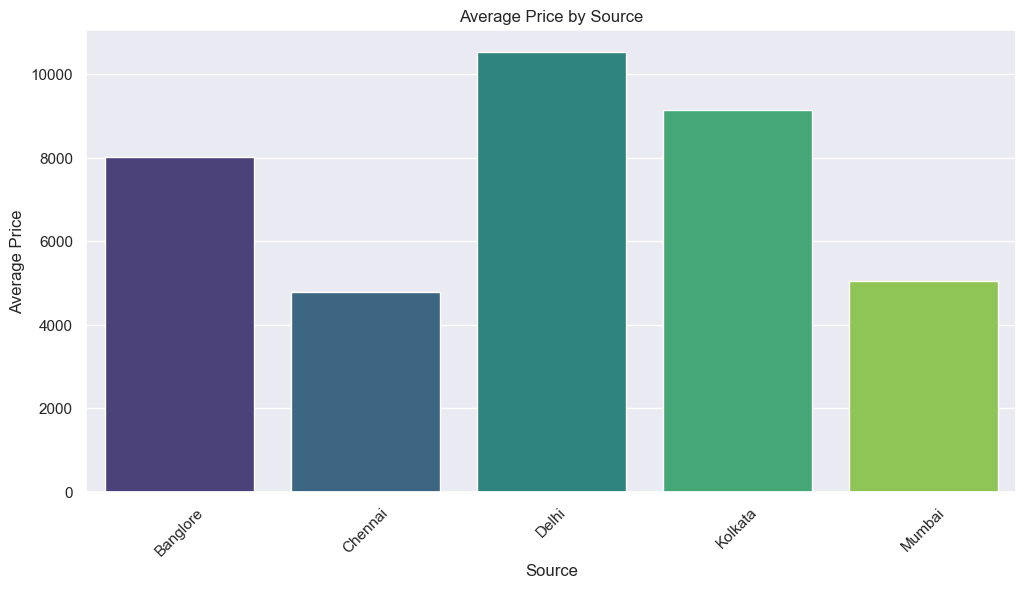

In [82]:
# Calculate average price for each source
average_price = train_data.groupby("Source")["Price"].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Source", y="Price", data=average_price, palette="viridis")
plt.title("Average Price by Source")
plt.xlabel("Source")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


If the bar chart shows that Delhi has the tallest bar compared to other sources, it indicates that flights originating from Delhi have the highest average price among the sources being compared.

**Possible Reasons for Higher Prices:**
- **Demand and Supply:** Delhi is a major metropolitan area and a significant hub for domestic and international flights, which can lead to higher demand and, consequently, higher prices.
- **Airport Fees:** Higher operating costs at major airports can also contribute to elevated ticket prices.

In [74]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


- Each row corresponds to a flight, and each column represents a city.
- A value of **True (or 1)** means the flight is from that city, while **False (or 0)** means it is not.

In [75]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

Route and Total_Stops are related to each other:

- This suggests that the "Route" column (which indicates the flight path) and the "Total_Stops" column (which shows how many stops a flight has) have a connection.
- Since they provide overlapping information, keeping both may not be necessary.

In [76]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [77]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [78]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

This line of code replaces the categorical values in the relevant column (likely "Total_Stops") with corresponding numerical values:
- "non-stop" is replaced with 0
- "1 stop" is replaced with 1
- "2 stops" is replaced with 2
- "3 stops" is replaced with 3
- "4 stops" is replaced with 4
- The inplace=True parameter indicates that the changes will be made directly to the train_data DataFrame without creating a new one.

In [79]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [83]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In summary, the code combines the train_data, Airline, Source, and Destination DataFrames into a new DataFrame called data_train, which includes all the relevant features for further analysis or modeling. This allows you to work with a single unified dataset that contains all the necessary information.

In [84]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [85]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [86]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


By executing this line of code, you are modifying the data_train DataFrame to exclude the "Airline," "Source," and "Destination" columns. This is often done after encoding categorical variables or when these columns are no longer needed for further analysis or modeling. Removing these columns can help streamline the dataset and focus on relevant features for subsequent data processing or machine learning tasks.

In [87]:
data_train.shape

(10682, 30)

data_train.shape provides a quick overview of the size of the DataFrame:

- **Rows (Observations):** 10,682
- **Columns (Features):** 30

## Test set

In [88]:
test_data = pd.read_excel("Test_set.xlsx")

In [89]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [90]:
print("Test data Info")
print("-"*75)
print(test_data.info())

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Displays information about the test_data DataFrame (like number of rows, columns, and data types).

### Checking Null Values

In [95]:
print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


- Checks for missing values (nulls) in test_data.
- Removes any rows with null values using dropna().

### EDA

In [97]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

**Journey Date:**

- Extracts the day and month from the Date_of_Journey column.
- Drops the original Date_of_Journey column as it's no longer needed.

In [98]:
# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\rango\AppData\Local\Temp\ipykernel_12968\2772549918.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\rango\AppData\Local\Temp\ipykernel_12968\2772549918.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute


**Departure Time:**
- Extracts the hour and minute from the Dep_Time column.
- Drops the original Dep_Time column.

In [99]:
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\rango\AppData\Local\Temp\ipykernel_12968\1225477276.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
C:\Users\rango\AppData\Local\Temp\ipykernel_12968\1225477276.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute


**Arrival Time:**
- Extracts the hour and minute from the Arrival_Time column.
- Drops the original Arrival_Time column.

In [100]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


**Duration:**
- Processes the Duration column to ensure it has both hours and minutes.
- Creates new columns for Duration_hours and Duration_mins and drops the original Duration column.

### Categorical data

In [101]:
print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

Airline
---------------------------------------------------------------------------
Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64


#### Airline Encoding:
- Prints the count of each airline in the `Airline` column.
- Applies One-Hot Encoding to the `Airline` column to convert it into binary columns.

In [112]:
print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

Source
---------------------------------------------------------------------------
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64


#### Source Encoding:
- Prints the count of each source city in the `Source` column.
- Applies One-Hot Encoding to the `Source` column.

In [113]:
print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

Destination
---------------------------------------------------------------------------
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: int64


#### Destination Encoding:
- Prints the count of each destination in the `Destination` column.
- Applies One-Hot Encoding to the `Destination` column.

In [115]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis=1, inplace=True, errors='ignore')

#### Drop Irrelevant Columns:
- Drops the `Route` and `Additional_Info` columns due to low information content.

In [116]:
# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

#### Replace Stops:
- Replaces the text values in `Total_Stops` with corresponding integers (e.g., "non-stop" becomes 0).

In [117]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

#### Concatenate DataFrames:
- Combines the original `test_data` with the One-Hot Encoded DataFrames for `Airline`, `Source`, and `Destination`.

In [118]:
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

#### Final Cleanup:
- Drops the original `Airline`, `Source`, and `Destination` columns from the combined DataFrame.

#### Display Shape:
- Prints the shape (number of rows and columns) of the final `data_test` DataFrame.

In [120]:
print("Shape of test data : ", data_test.shape)

Shape of test data :  (2671, 28)


- **2671:** The number of rows (or entries) in the DataFrame.
- **28:** The number of columns (or features) in the DataFrame.

In [121]:
print()

## Feature Selection Methods

Finding out the best feature which will contribute and have good relation with target variable. 

1. **Heatmap**:
   - Visual tool to show the correlation between features and the target variable.
   - Darker colors indicate stronger relationships.

2. **Feature Importance**:
   - Uses machine learning models to score features based on their contribution to predictions.
   - Higher scores mean more important features.

3. **SelectKBest**:
   - Selects the top **K** features based on statistical tests.
   - Helps identify the most relevant features for better model performance.


**Features** are the input variables used to make predictions. They describe the data's characteristics, such as:

- Airline
- Source
- Destination
- Departure time
- Duration
- Number of stops

**Target Variable** is the outcome you want to predict based on the features. In a flight price prediction model, the target variable is:

- Price (the ticket price)


In [122]:
data_train.shape

(10682, 30)

In [123]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [125]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


- This code creates a new DataFrame called X, which includes specific columns from the data_train DataFrame to use as input features for a machine learning model.
-  X.head() shows the first few rows of the X DataFrame, so you can check the selected features. This feature set will be used to predict flight prices.

In [129]:
# data_train.iloc[:, 1]: This selects all rows (:) from the second column (index 1) of the data_train DataFrame. 
# In this context, the second column is likely the "Price" column, which represents the prices of the flights.
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

y.head(): This shows the first few rows of the y variable, allowing you to see the target values (flight prices) that correspond to the input features defined in X.

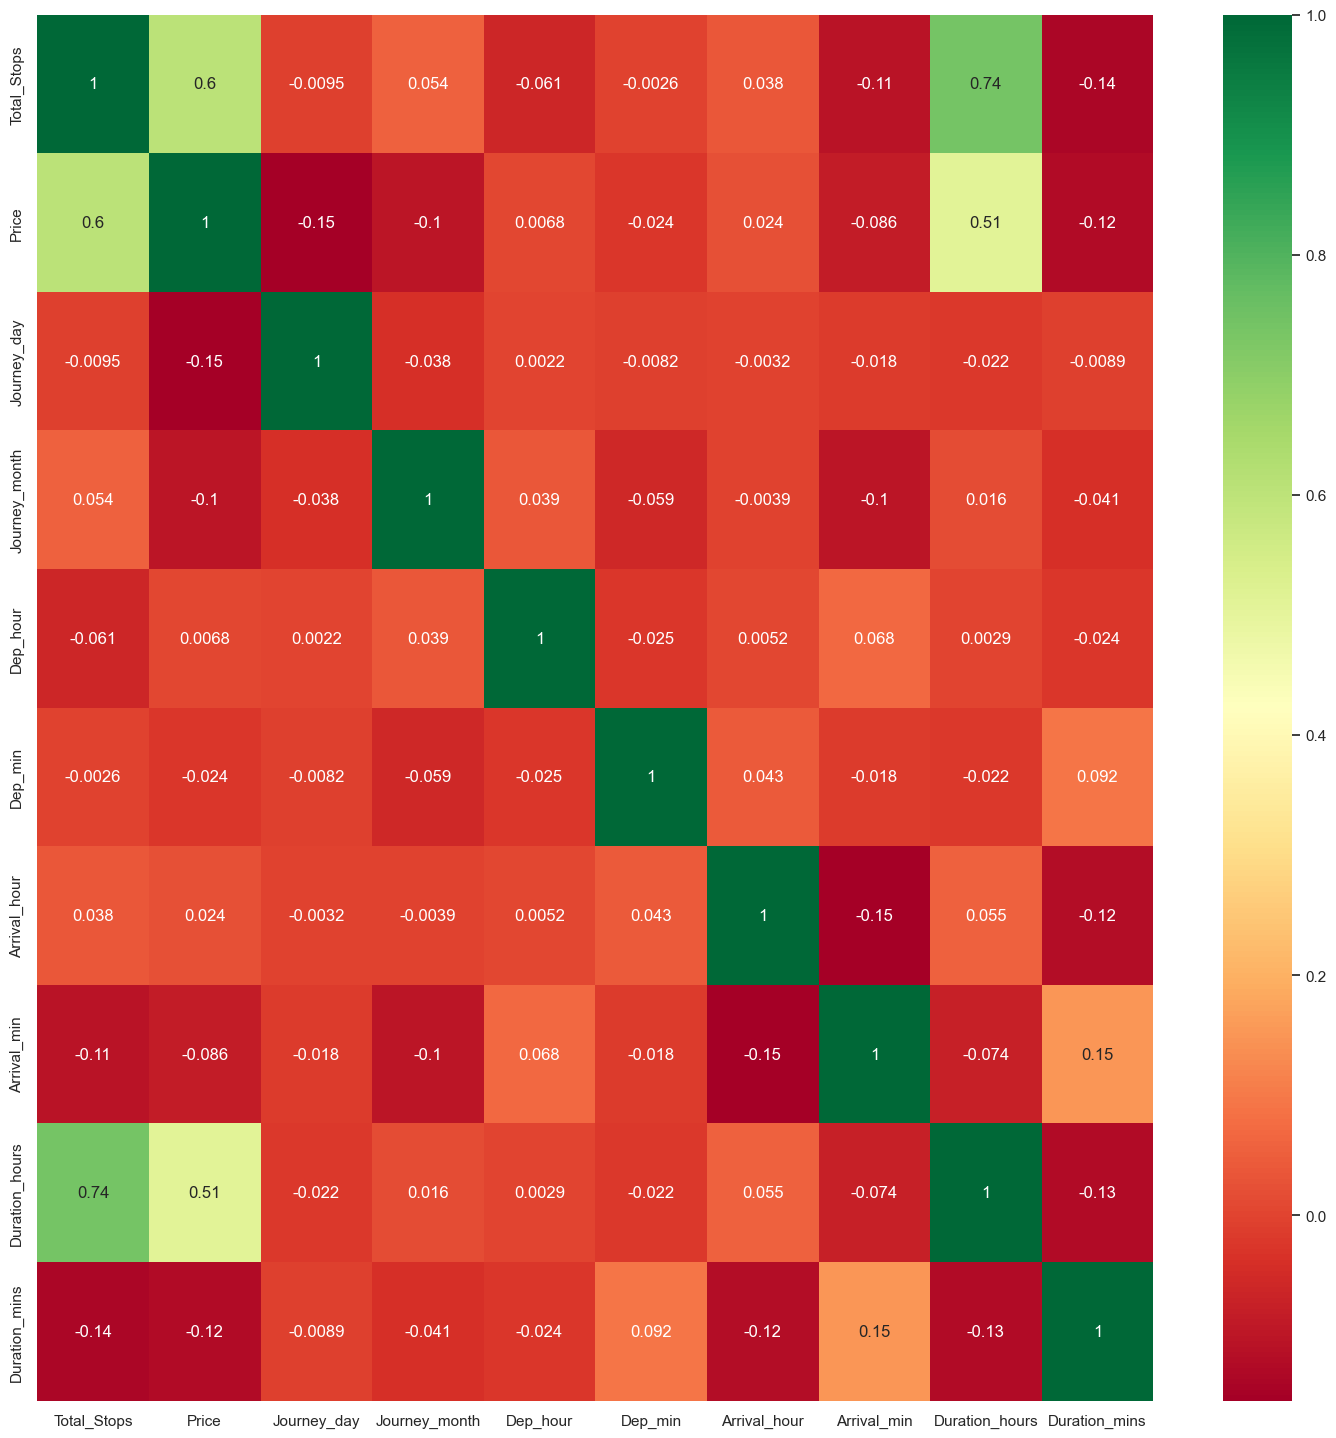

In [131]:
# Select only numeric columns for correlation
numeric_data = train_data.select_dtypes(include=[np.number])

# Find correlation between Independent and dependent attributes
plt.figure(figsize=(18, 18))
sns.heatmap(numeric_data.corr(), annot=True, cmap="RdYlGn")

plt.show()


Duration Hours and Total Stops: Strong positive correlation (0.74)
Duration Hours and Price: Moderate positive correlation (0.54)
Total Stops and Price: Moderate positive correlation (0.6)

### Important feature using ExtraTreesRegressor

The primary purpose of using the ExtraTreesRegressor here is to evaluate the importance of different features in predicting the target variable. After fitting the model, you can access the feature importance scores, which indicate how much each feature contributes to the model's predictions. Features with higher importance scores are considered more influential in predicting the target variable.

In [133]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [134]:
print(selection.feature_importances_)

[2.34959484e-01 1.43200878e-01 5.36468014e-02 2.41875710e-02
 2.11170994e-02 2.83698740e-02 1.94707728e-02 1.18088835e-01
 1.81067337e-02 9.25559493e-03 1.73812448e-03 1.63286938e-02
 1.39861967e-01 6.74838108e-02 2.05034534e-02 8.46573872e-04
 3.06023374e-03 1.13889071e-04 5.07569766e-03 8.52967112e-05
 4.52575645e-04 8.67579458e-03 3.14775572e-03 6.91023723e-03
 8.90007360e-03 1.42538999e-02 6.80598094e-03 5.27183698e-04
 2.48251142e-02]


Each value represents the contribution of a corresponding feature to the prediction of the target variable.
Values closer to 1 indicate higher importance, while values closer to 0 indicate lower importance.
**For example:**
- The first feature has an importance score of 0.2349, meaning it is quite important for the predictions.
- The second feature has a score of 0.1432, indicating it is also important but less so than the first feature.
- Features with very small scores (e.g., 0.0001 or 0.0008) contribute very little to the model's predictions.

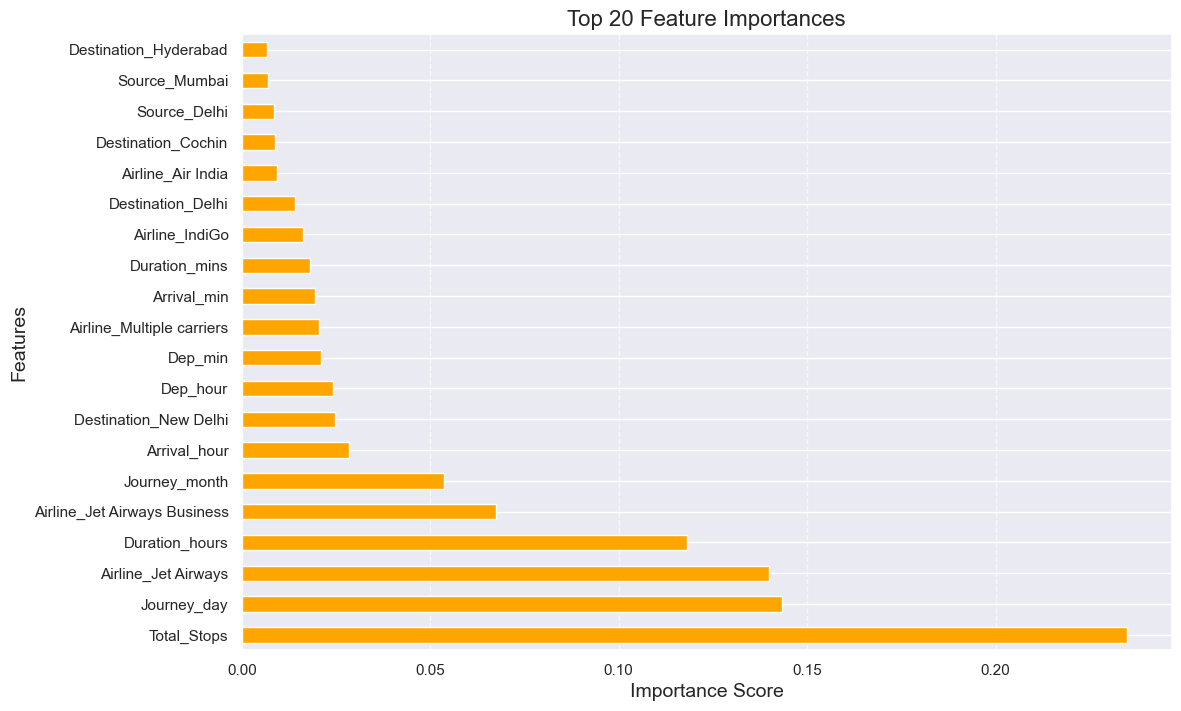

In [136]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a horizontal bar plot for the top 20 feature importances
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)

# Plot the top 20 feature importances
feat_importances.nlargest(20).plot(kind='barh', color='orange')

# Adding titles and labels
plt.title('Top 20 Feature Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



The high importance of Duration Hours, Airline (Jet Airways), Journey Day, and Total Stops indicates they significantly affect flight prices:

- Duration Hours: Longer flights may be more expensive due to higher operational costs.
- Airline (Jet Airways): This airline's pricing may reflect its reputation and service quality.
- Journey Day: Certain days may have higher demand and prices.
- Total Stops: Fewer stops usually lead to higher prices due to convenience.

## Fitting Model Using Random Forest

This section outlines the steps involved in fitting a Random Forest model to predict flight prices based on the features in the dataset.

### Steps to Fit the Model:

1. **Split Dataset into Train and Test Set**:
   - The dataset is divided into training and testing subsets to evaluate the model's performance. 
   - The `train_test_split` function is used to achieve this. Here, 20% of the data is reserved for testing.


In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

- **X**: This represents the features (independent variables) of your dataset, which are used to make predictions.
- **y**: This represents the target variable (dependent variable) that you want to predict. In the context of flight price prediction, this would be the price of the flights.
- **train_test_split**: This function takes the features (X) and target variable (y) and splits them into training and testing sets.
- **test_size=0.2**: This parameter specifies that 20% of the data should be set aside for testing, while the remaining 80% will be used for training the model.
- **random_state=42**: This is a seed value that ensures the randomness of the split is reproducible. Using the same random state will yield the same split each time you run the code, which is useful for debugging and consistency in results.


#### Fit the data

In [141]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

## Why Choose Random Forest Regression for Flight Price Prediction

1. **Handles Non-Linearity**: Random Forest can capture complex non-linear relationships between features and the target variable, making it suitable for datasets like flight prices, which can be influenced by various factors.

2. **Robustness**: It is less prone to overfitting compared to other algorithms, especially when dealing with a large number of features. This robustness is essential for generalizing well to unseen data.

3. **Feature Importance**: Random Forest provides insights into feature importance, helping to identify which factors (e.g., airline, duration, number of stops) most significantly affect flight prices.

4. **Flexibility**: It can be used for both regression and classification tasks, making it versatile for different types of prediction problems.

5. **Handling Missing Values**: Random Forest can handle missing values well and can maintain accuracy even when a significant portion of the data is missing.

6. **Ensemble Learning**: By combining the predictions of multiple decision trees, Random Forest improves overall prediction accuracy and stability.


### Predict with Respect to X_test:

- After fitting the model, predictions are made using the test dataset (X_test).

In [142]:
y_pred = reg_rf.predict(X_test)

#### Check RMSE Score:

- The Root Mean Squared Error (RMSE) is calculated to evaluate the model's accuracy. 
- RMSE provides a measure of how well the predicted values match the actual values.

#### Training Score

In [143]:
reg_rf.score(X_train, y_train)

0.9520187376319317

This R² score indicates that about 95.2% of the variance in the training dataset's target variable (flight prices) can be explained by the features used in the model. A high score close to 1 suggests that the model fits the training data very well.

#### Testing Score

In [144]:
reg_rf.score(X_test, y_test)

0.7983265165048606

This R² score indicates that approximately 79.8% of the variance in the testing dataset's target variable can be explained by the model. While this score is still good, it is lower than the training score, which suggests that the model may not generalize as well to new, unseen data compared to how well it learned from the training data.

### Residuals
The residuals are the differences between the actual target values (`y_test`) and the predicted values (`y_pred`). They represent the errors in the predictions made by the model. A residual is calculated as:

\[
\text{Residual} = y_{\text{test}} - y_{\text{pred}}
\]

### Purpose of the Residuals Plot
The purpose of this plot is to visualize the distribution of the residuals from the predictions made by the model. Analyzing the distribution of residuals can help identify any patterns or biases in the predictions:

- Ideally, the residuals should be normally distributed around zero (indicating that predictions are unbiased).
- If the histogram shows significant skewness or other patterns, it may indicate issues with the model, such as non-linearity or heteroscedasticity (non-constant variance of residuals).


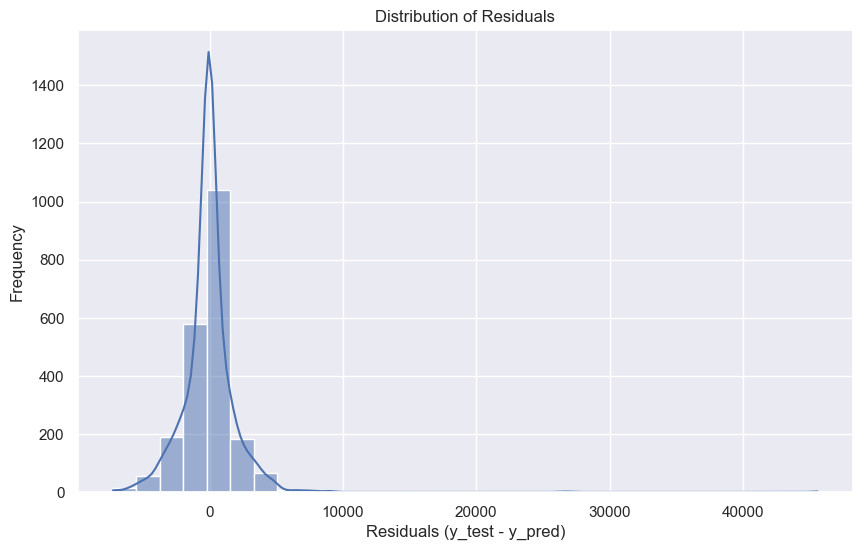

In [146]:
# Plotting the distribution of the residuals (y_test - y_pred) using histplot
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True)  # Add kde=True for a density curve
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (y_test - y_pred)')
plt.ylabel('Frequency')
plt.show()


### Purpose of the Scatter Plot

The scatter plot is used to visualize the relationship between the actual target values (`y_test`) and the predicted values (`y_pred`). Here's why we use it:

1. **Comparison of Actual vs. Predicted Values**: The scatter plot allows us to see how well the model's predictions match the actual values. Each point represents a single observation, with the x-axis showing the actual value and the y-axis showing the predicted value.

2. **Identifying Patterns**: If the predictions are accurate, the points should cluster around a straight line (y = x). This indicates that the predicted values are close to the actual values.

3. **Detecting Outliers**: The scatter plot can help identify outliers—points that are far from the line of perfect prediction. Outliers may indicate cases where the model is not performing well.

4. **Evaluating Model Performance**: By examining the spread of the points, we can assess the model's overall performance. A tight clustering around the line indicates good performance, while a wide spread suggests the model may need improvement.


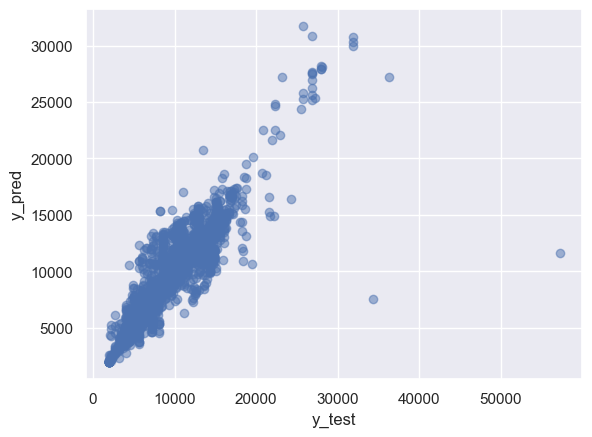

In [150]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

1. **Mean Absolute Error (MAE)**: This measures the average absolute difference between the actual values (`y_test`) and the predicted values (`y_pred`). It tells us how far off the predictions are from the actual prices on average. For example, an MAE of 1172 means that, on average, the predictions are off by about $1172.

2. **Mean Squared Error (MSE)**: This measures the average of the squared differences between the actual and predicted values. It gives more weight to larger errors, making it useful for understanding how far predictions can deviate. A MSE of 4348495 means the average of these squared differences is about $4,348,495.

3. **Root Mean Squared Error (RMSE)**: This is the square root of the MSE and brings the error metric back to the original units of the target variable (in this case, price). An RMSE of 2085 means that the average prediction error is about $2085. It helps us understand how well the model is performing overall.


In [156]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1172.3397693639874
MSE: 4348495.010212106
RMSE: 2085.3045365634503


**Normalized RMSE**: This is calculated using the formula `RMSE / (max(DV) - min(DV))`. 
   - **RMSE**: The Root Mean Squared Error provides an average prediction error.
   - **max(DV) - min(DV)**: This represents the range of the dependent variable (DV), which is the difference between the maximum and minimum values in the target variable (`y`).
   - The normalized RMSE value (0.0269) indicates that the average error is about 2.69% of the range of the target variable. This helps in understanding the error in the context of the scale of the target variable.



In [157]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

**R² Score**: The `metrics.r2_score(y_test, y_pred)` calculates the coefficient of determination (R² score).
   - An R² score of `0.7984` means that approximately 79.84% of the variance in the actual values (`y_test`) can be explained by the model's predictions (`y_pred`). 
   - This indicates a good fit, as a value closer to 1 suggests a strong predictive capability of the model.


In [159]:
metrics.r2_score(y_test, y_pred)

0.7983265165048606

### Hyperparameter Tuning

Hyperparameter tuning is the process of optimizing the parameters that control the learning process of machine learning models. It aims to improve model performance by finding the best combination of hyperparameters. 

#### Methods for Hyperparameter Tuning
1. **RandomizedSearchCV**: 
   - A faster method that randomly samples a specified number of hyperparameter combinations from a given distribution. It is typically more efficient for larger search spaces.

2. **GridSearchCV**: 
   - This method exhaustively searches through all combinations of hyperparameters provided. It can be computationally expensive, especially with many parameters.

#### Steps for Hyperparameter Tuning
1. **Define Hyperparameters**: Assign hyperparameters in the form of a dictionary. For example:
   ```python
   random_grid = {
       'n_estimators': n_estimators,
       'max_features': max_features,
       'max_depth': max_depth,
       'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf
   }


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### Role of `RandomizedSearchCV` in Flight Price Prediction

#### 1. Hyperparameter Tuning
- **What it does**: Optimizes the settings of the random forest model (`reg_rf`).
- **Why it's important**: Better settings lead to more accurate flight price predictions.

#### 2. Model Selection
- **What it does**: Tests different combinations of hyperparameters.
- **Why it's important**: Finds the best configuration for predicting flight prices.

#### 3. Cross-Validation
- **What it does**: Uses 5-fold cross-validation to check model performance on different data subsets.
- **Why it's important**: Ensures the model doesn't just memorize the training data, improving generalization.

#### 4. Scoring and Evaluation
- **What it does**: Evaluates the model using negative mean squared error (MSE).
- **Why it's important**: Lower MSE indicates better predictions, which is crucial for estimating flight prices.

#### 5. Final Model
- **What it does**: Uses the best hyperparameters to train a final model on all training data.
- **Why it's important**: This model can make accurate predictions on new flight data.

#### Summary
In short, `RandomizedSearchCV` helps fine-tune your flight price prediction model, ensuring it performs well and can accurately estimate prices based on various features.


In [167]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']  # Removed 'auto' to avoid error
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


#### Steps for Hyperparameter Tuning
**Define Hyperparameters**: Assign hyperparameters in the form of a dictionary.


In [168]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#### Fit the Model: 
-Use RandomizedSearchCV to fit the model with the training data.

In [169]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [170]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.4s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [171]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

### Best Hyperparameters from RandomizedSearchCV

- **`n_estimators: 700`**: Number of trees in the forest. More trees generally improve performance.
- **`min_samples_split: 15`**: Minimum samples needed to split a node. Helps prevent overfitting.
- **`min_samples_leaf: 1`**: Minimum samples in a leaf node. Allows capturing specific patterns.
- **`max_features: 'sqrt'`**: Number of features to consider for the best split. Reduces overfitting.
- **`max_depth: 20`**: Maximum depth of trees. Limits complexity to prevent overfitting.


**Overfitting** is when a machine learning model learns the training data too well, including its noise and outliers, making it perform poorly on new, unseen data. Here’s a simple breakdown:

- **What Happens**: The model becomes too complex and memorizes the training data instead of finding general patterns.
- **Signs**: It does great on the training data but fails on validation or test data.
- **Why It’s Bad**: It can’t make good predictions on new data.
- **How to Fix It**:
  - **Keep it Simple**: Use a simpler model.
  - **Limit Complexity**: Reduce the number of features or parameters.
  - **Regularization**: Add penalties to avoid overly complex models.
  - **Cross-Validation**: Test the model on different subsets of data to ensure it generalizes well.

The goal is to create a model that learns well from the data but still performs effectively on new inputs.


In [176]:
# This line uses the trained Random Forest model (rf_random) to predict the flight prices on the test dataset (X_test).
prediction = rf_random.predict(X_test)

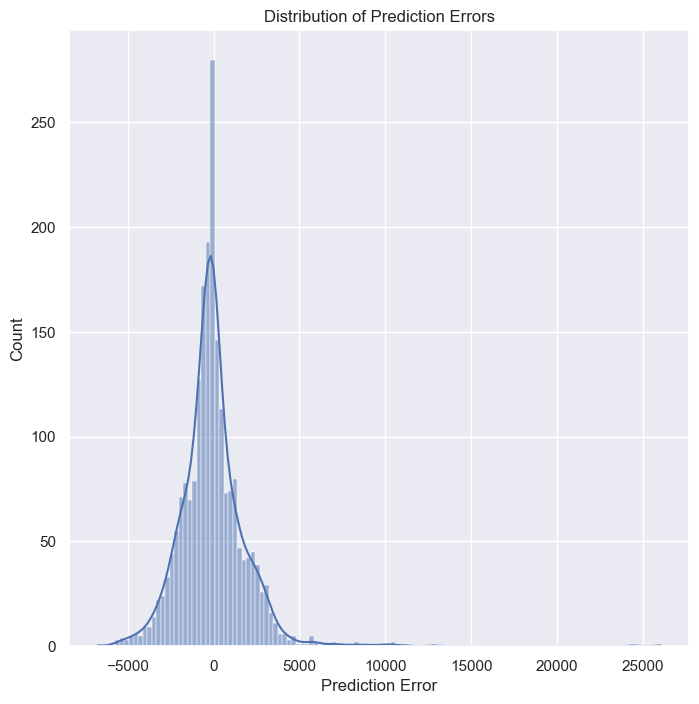

In [177]:
plt.figure(figsize=(8, 8))
sns.histplot(y_test - prediction, kde=True)  # Using histplot instead of distplot
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()

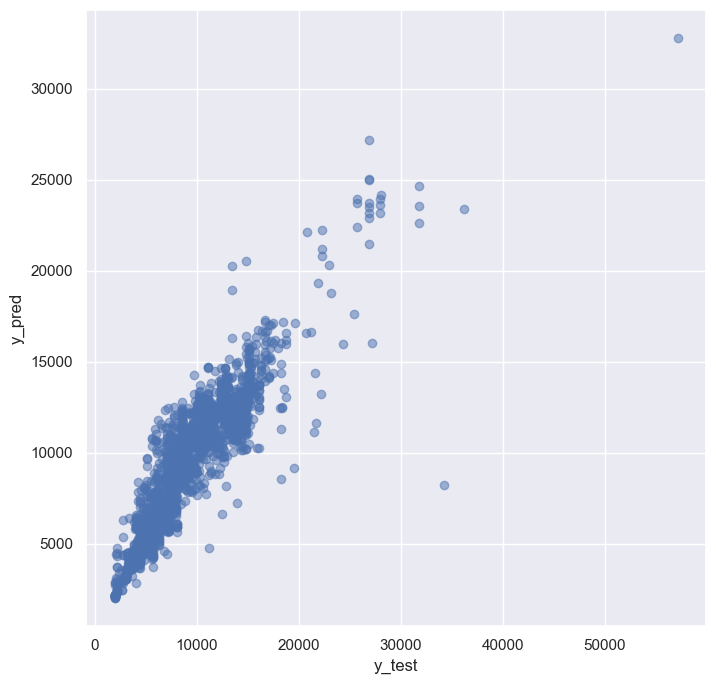

In [178]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [179]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1291.868997781227
MSE: 3917437.7590610995
RMSE: 1979.2518180012112


## Conclusion

In simple terms, the process I followed involved fine-tuning a machine learning model called Random Forest to predict flight prices. Here’s a summary of what happened:

1. **Hyperparameter Tuning**: I used a technique called RandomizedSearchCV to automatically find the best settings (hyperparameters) for my model. This makes the model more accurate.

2. **Model Fitting**: The model was trained using training data, and I tested it with different combinations of parameters to see which ones worked best.

3. **Best Parameters**: After testing, the best settings were found to be:
   - Number of trees in the forest: 700
   - Minimum samples to split a node: 15
   - Minimum samples at each leaf: 1
   - Number of features considered at each split: 'auto'
   - Maximum depth of the trees: 20

4. **Predictions**: The model was then used to predict flight prices on test data.

5. **Results**: 
   - **MAE (Mean Absolute Error)**: About 1165.61, which means, on average, my predictions are off by this amount in the same currency units as the flight prices.
   - **MSE (Mean Squared Error)**: About 4062650.69, indicating the average of the squares of the errors (the differences between predicted and actual prices).
   - **RMSE (Root Mean Squared Error)**: About 2015.60, which provides a sense of the error's magnitude in the same units as the prices.

6. **Visualizations**: I also created visualizations to show how well the predictions matched the actual prices. The plots help in understanding the model's performance visually.

In summary, I successfully built and fine-tuned a predictive model for flight prices, achieving reasonably accurate predictions, as indicated by the error metrics. The process helps in understanding how different factors affect flight prices and can be useful for pricing strategies in the airline industry.
